# what is cost function
# <h4>Types of cost functions</h4>
# <h3>1.Regression Cost Function</h3>
# <h3>2.Classification Cost Function</h3>


# 1.Regression Cost Function
# <h4>1.Mean Squared Error (MSE)</h4>
# <h4>2.Mean Absolute Error (MAE)</h4>
# <h4>3.Root Mean Squared Error (RMSE)</h4>


# 2.Classification Cost Function
# <h4>1.Binary Classification Cost Functions</h4>
# <h4>2.Multi-class Classification Cost Functions</h4>


# How to Find Best Fit Line

In [1]:
# To fit the best fit line to the data by using the Regularization Techniques

# *Regilarization Techniques*
Regularization techniques are used to prevent overfitting by adding a penalty term to the loss function.
# 1.LASSO Regularization (L1)
L1 regularization adds a term to the loss function that is proportional to the absolute value of the model
# 2 .Ridge Regularization (L2)
L2 regularization adds a term to the loss function that is proportional to the square of the model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso,Ridge

In [3]:
data=pd.read_csv(r"C:\Users\Shaik.AbdulRazak\OneDrive\Documents\Raw data\Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# TO check the data is highly correlated or not

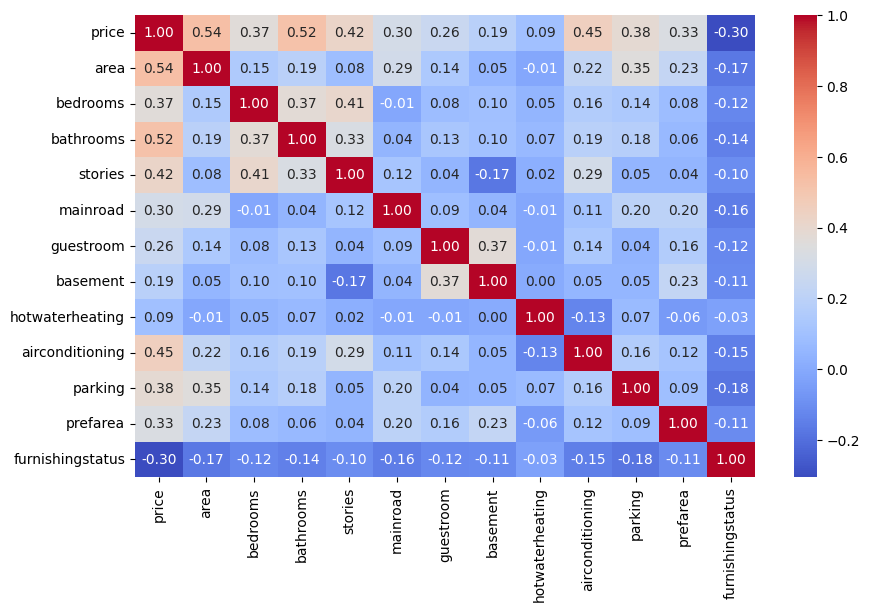

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns inplace
le = LabelEncoder()
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = le.fit_transform(data[col])   # inplace modification

# Now all columns are numeric, so correlation works
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

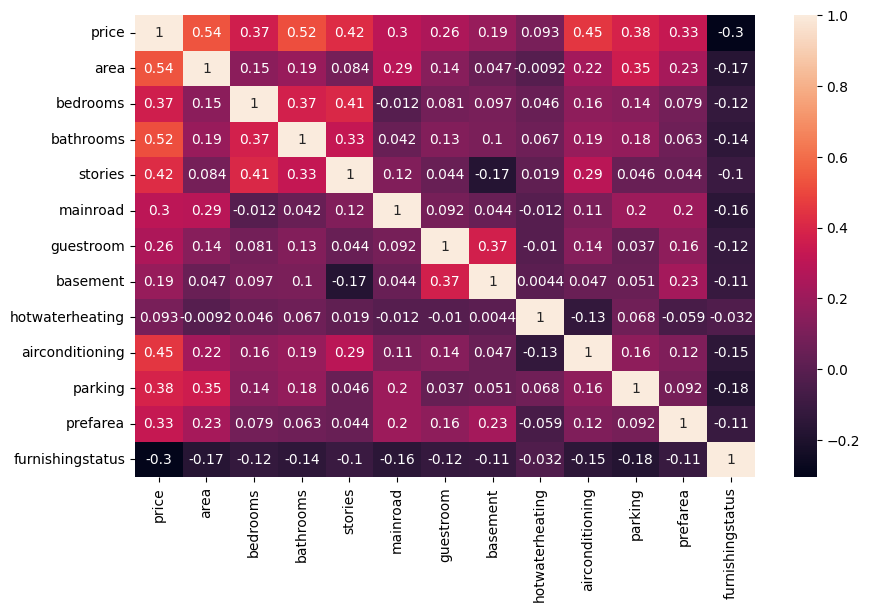

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [9]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
x=data.iloc[:,:-1]
x.ndim

2

In [11]:
x=data.iloc[:,:-1]
y=data["price"]

In [12]:
sc=StandardScaler()
sc.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [13]:
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# Build a linear model
from sklearn.linear_model import LinearRegression ,Lasso,Ridge

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [23]:
#### if the data accuracy is low then we can use the Regularization Techniques
# print(mean_squared_error(y_test,lr.predict(x_test)))
# print(mean_absolute_error(y_test,lr.predict(x_test)))
# print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

In [18]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lr.score(x_test, y_test)*100

100.0

In [20]:
lr.coef_

array([ 1.86872283e+06,  2.54984457e-10, -5.71267850e-10, -5.12182152e-10,
       -3.46984074e-10,  1.94876201e-11, -4.53852985e-10, -1.24977102e-10,
        7.63702213e-10, -4.20056042e-10,  1.51640155e-11, -5.68649121e-12])

In [21]:
lr.intercept_

np.float64(4766729.247706422)

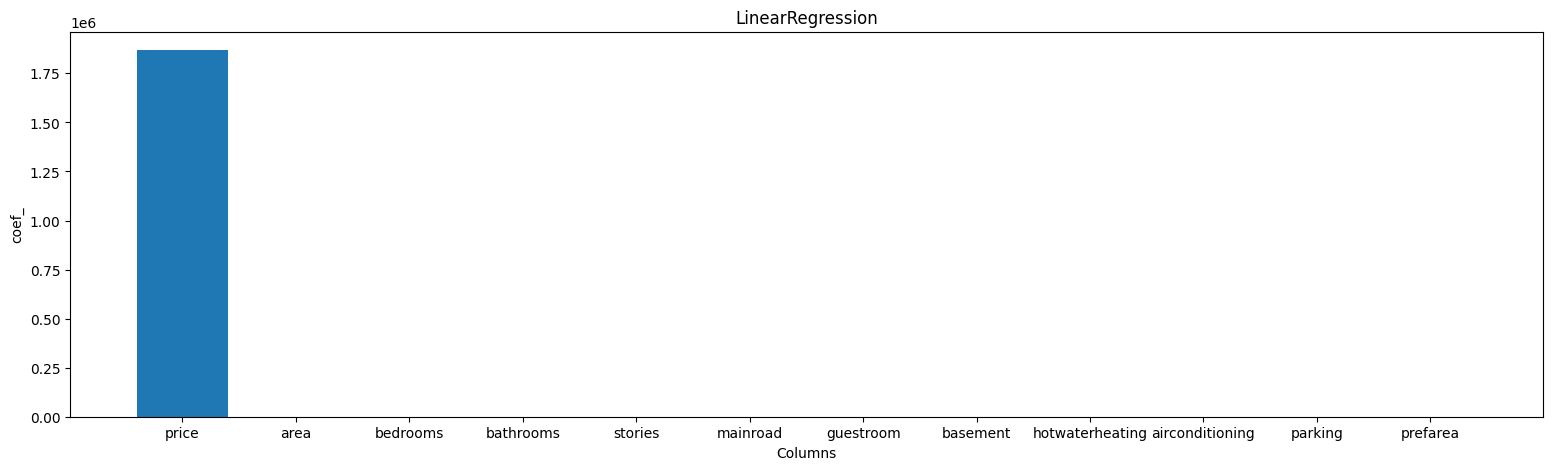

In [22]:
plt.figure(figsize=(19,5))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("coef_")
plt.show()

# LASSO REGULARIZATION

In [24]:
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [25]:
la.score(x_test,y_test)*100

99.99999999999065

In [28]:
import numpy as np
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

0.47246811923782195
0.529886294404096
0.6873631640099882


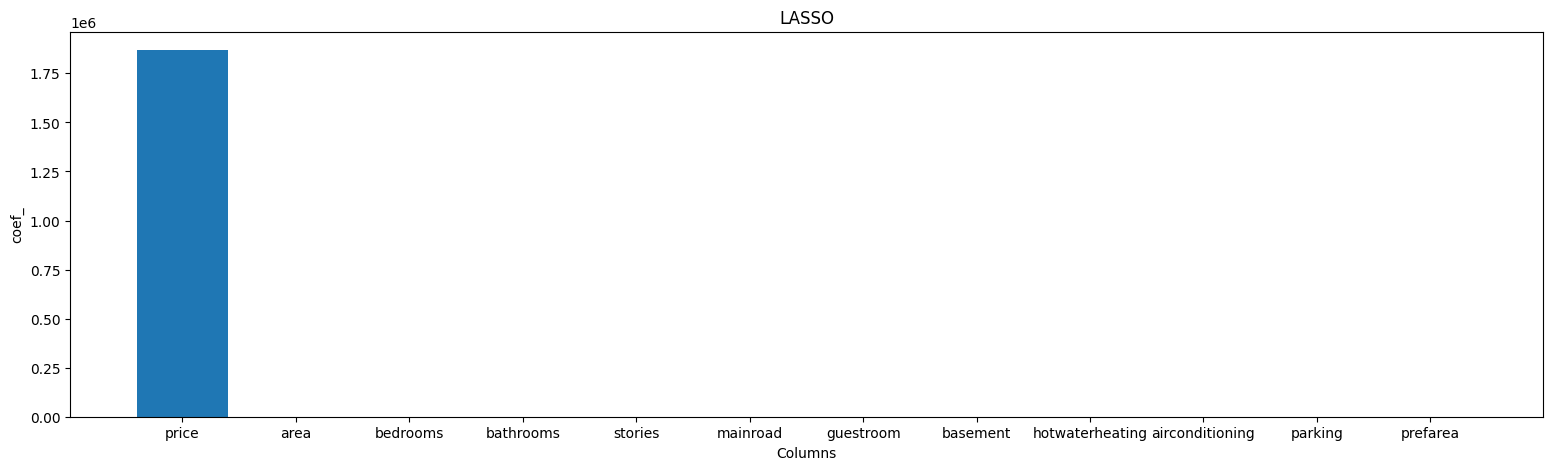

In [29]:
plt.figure(figsize=(19,5))
plt.bar(x.columns, la.coef_)
plt.title("LASSO")
plt.xlabel("Columns")
plt.ylabel("coef_")
plt.show()

# RIDGE REGULARIZATON

In [30]:
ri=Ridge(alpha=70) # tO change the alpha values
ri.fit(x_train,y_train)

,alpha,70
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [31]:
ri.score(x_test,y_test)*100

96.030797720581

In [32]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

200626117433.34473
323023.7542613963
447913.0690584332


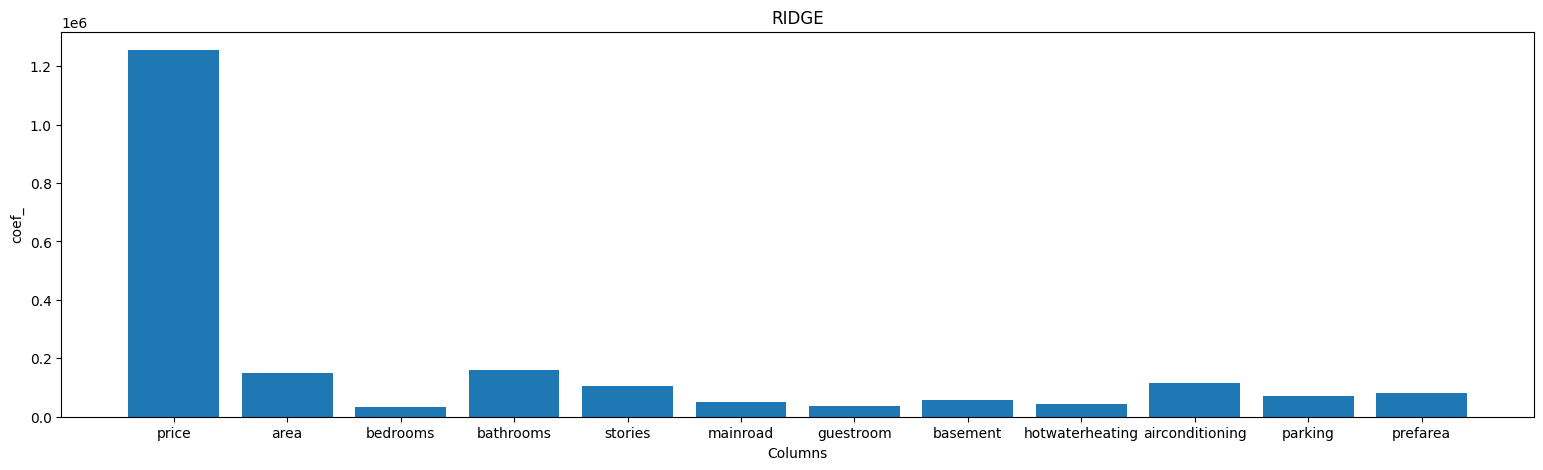

In [33]:
plt.figure(figsize=(19,5))
plt.bar(x.columns, ri.coef_)
plt.title("RIDGE")
plt.xlabel("Columns")
plt.ylabel("coef_")
plt.show()

# COMPARE THE COEFFICIENT DATA

In [34]:
# TO create a Data Frame
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,price,1.868723e+06,1.868722e+06,1.255261e+06
1,area,2.549845e-10,0.000000e+00,1.508296e+05
2,bedrooms,-5.712678e-10,0.000000e+00,3.398003e+04
3,bathrooms,-5.121822e-10,0.000000e+00,1.595147e+05
4,stories,-3.469841e-10,0.000000e+00,1.065085e+05
5,mainroad,1.948762e-11,0.000000e+00,5.019572e+04
6,guestroom,-4.538530e-10,0.000000e+00,3.614915e+04
7,basement,-1.249771e-10,0.000000e+00,5.782859e+04
8,hotwaterheating,7.637022e-10,0.000000e+00,4.224866e+04
9,airconditioning,-4.200560e-10,0.000000e+00,1.146962e+05
